In [24]:
import pandas as pd
import numpy as np

In [25]:
dataset_path = r"C:\Users\user\Desktop\Purwadhika\2. Materi\Capstone Project"

In [27]:
My_hotel = pd.read_csv(f"{dataset_path}/data_hotel_booking_demand.csv")
My_hotel

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


In [28]:
My_hotel.isnull().sum()

country                        351
market_segment                   0
previous_cancellations           0
booking_changes                  0
deposit_type                     0
days_in_waiting_list             0
customer_type                    0
reserved_room_type               0
required_car_parking_spaces      0
total_of_special_requests        0
is_canceled                      0
dtype: int64

Terdapat Missing Value pada kolom Country sebanyak 351

In [29]:
My_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


In [30]:
My_hotel['country'].value_counts().head()

country
PRT    34097
GBR     8495
FRA     7307
ESP     5996
DEU     5116
Name: count, dtype: int64

Dari data tersebut menunjukan beberapa negara dengan jumlah terbanyak

In [31]:
modus_country = My_hotel['country'].mode()[0]
My_hotel['country'].fillna(modus_country, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_11820\1436968604.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  My_hotel['country'].fillna(modus_country, inplace=True)


In [32]:
My_hotel.isnull().sum()

country                        0
market_segment                 0
previous_cancellations         0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
reserved_room_type             0
required_car_parking_spaces    0
total_of_special_requests      0
is_canceled                    0
dtype: int64

In [33]:
import matplotlib.pyplot as plt

In [34]:
print(My_hotel['country'])

0        IRL
1        FRA
2        PRT
3        NLD
4        PRT
        ... 
83568    PRT
83569    FRA
83570    PRT
83571     CN
83572    PRT
Name: country, Length: 83573, dtype: object


In [35]:
country_counts = My_hotel['country'].value_counts().head(10)

<Axes: xlabel='country'>

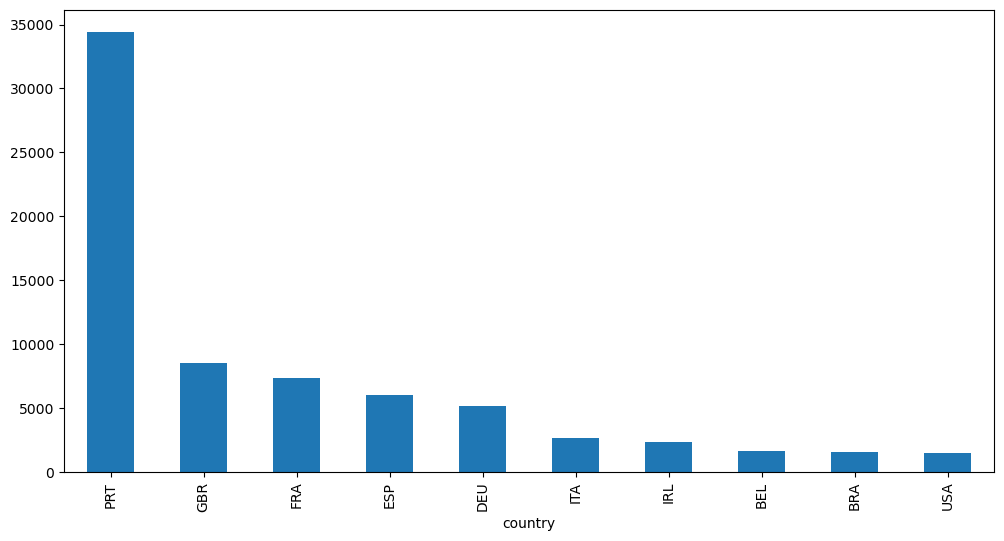

In [36]:
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar')

Hasil Analisis Negara terbanyak yang melakukan Booking Hotel tersebut adalah ;
1. Portugal (PRT) memiliki jumlah pemesanan tertinggi
2. Negara-negara seperti Brazil dan Italy juga menunjukkan tingkat pembatalan yang cukup tinggi meskipun volume booking-nya tidak sebesar Portugal.

In [37]:
booking_per_segment = My_hotel['market_segment'].value_counts().reset_index()
booking_per_segment.columns = ['market_segment', 'total_bookings']

cancel_rate_per_segment = My_hotel.groupby('market_segment')['is_canceled'].mean().reset_index()
cancel_rate_per_segment['cancelation_rate (%)'] = cancel_rate_per_segment['is_canceled'] * 100
cancel_rate_per_segment = cancel_rate_per_segment[['market_segment', 'cancelation_rate (%)']]

segment_stats = pd.merge(booking_per_segment, cancel_rate_per_segment, on='market_segment')

segment_stats = segment_stats.sort_values(by='total_bookings', ascending=False)

print(segment_stats)


  market_segment  total_bookings  cancelation_rate (%)
0      Online TA           39460             36.576280
1  Offline TA/TO           17025             34.014684
2         Groups           13721             61.307485
3         Direct            8898             15.138233
4      Corporate            3792             18.090717
5  Complementary             511             14.285714
6       Aviation             165             21.212121
7      Undefined               1            100.000000


Hasil Analisis dari market segment ;

1. Online TA (Online Travel Agents) adalah kanal utama pemesanan, tapi juga punya tingkat pembatalan cukup tinggi.

2. Groups memiliki tingkat pembatalan tertinggi → perlu strategi mitigasi untuk grup booking.

3. Direct bookings menunjukkan tingkat pembatalan terendah → bisa didorong lebih lanjut karena menunjukkan loyalitas.

C:\Users\user\AppData\Local\Temp\ipykernel_11820\3835812811.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(segment_stats['market_segment'], rotation=45)


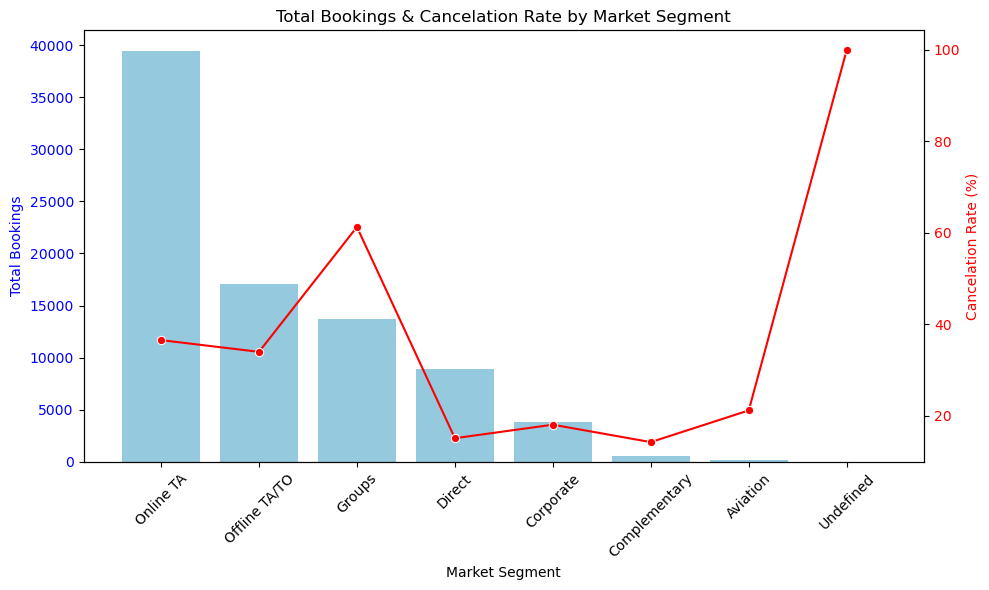

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

booking_per_segment = My_hotel['market_segment'].value_counts().reset_index()
booking_per_segment.columns = ['market_segment', 'total_bookings']

cancel_rate_per_segment = My_hotel.groupby('market_segment')['is_canceled'].mean().reset_index()
cancel_rate_per_segment['cancelation_rate (%)'] = cancel_rate_per_segment['is_canceled'] * 100
cancel_rate_per_segment = cancel_rate_per_segment[['market_segment', 'cancelation_rate (%)']]

segment_stats = pd.merge(booking_per_segment, cancel_rate_per_segment, on='market_segment')
segment_stats = segment_stats.sort_values(by='total_bookings', ascending=False)

fig, ax1 = plt.subplots(figsize=(10, 6))

sns.barplot(x='market_segment', y='total_bookings', data=segment_stats, ax=ax1, color='skyblue')
ax1.set_ylabel('Total Bookings', color='blue')
ax1.set_xlabel('Market Segment')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(segment_stats['market_segment'], rotation=45)

ax2 = ax1.twinx()
sns.lineplot(x='market_segment', y='cancelation_rate (%)', data=segment_stats, ax=ax2, color='red', marker='o')
ax2.set_ylabel('Cancelation Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Total Bookings & Cancelation Rate by Market Segment')
plt.tight_layout()
plt.show()

In [39]:
My_hotel.groupby('customer_type')['is_canceled'].mean() * 100


customer_type
Contract           30.707842
Group               9.692671
Transient          40.435503
Transient-Party    25.581661
Name: is_canceled, dtype: float64

In [40]:
booking_count = My_hotel['customer_type'].value_counts().reset_index()
booking_count.columns = ['customer_type', 'total_bookings']

cancel_rate = My_hotel.groupby('customer_type')['is_canceled'].mean().reset_index()
cancel_rate['cancelation_rate (%)'] = cancel_rate['is_canceled'] * 100
cancel_rate = cancel_rate[['customer_type', 'cancelation_rate (%)']]

customer_stats = pd.merge(booking_count, cancel_rate, on='customer_type')

print(customer_stats)


     customer_type  total_bookings  cancelation_rate (%)
0        Transient           62732             40.435503
1  Transient-Party           17536             25.581661
2         Contract            2882             30.707842
3            Group             423              9.692671


Hasil Analisis dari Customer Type;

1. Transient adalah kelompok terbanyak dan paling sering membatalkan.
2. Group adalah kelompok paling jarang membatalkan meskipun jumlahnya paling sedikit.
3. Contract cenderung stabil dengan pembatalan sedang.

In [41]:
grouped = My_hotel.groupby('total_of_special_requests')['is_canceled'].mean().reset_index()

grouped['cancelation_rate (%)'] = grouped['is_canceled'] * 100

print(grouped[['total_of_special_requests', 'cancelation_rate (%)']])


   total_of_special_requests  cancelation_rate (%)
0                          0             47.509555
1                          1             21.995348
2                          2             21.567982
3                          3             17.208520
4                          4             11.864407
5                          5              3.225806


Apakah tamu dengan banyak permintaan khusus lebih loyal?

ASUMSI

1. Loyalitas → diasumsikan dari tidak membatalkan pesanan (is_canceled = 0).
2. Banyak permintaan khusus → dilihat dari kolom total_of_special_requests yang nilainya > 0.

INTERPRETASI

1. Baris dengan total_of_special_requests = 0 akan menunjukkan pembatalan dari tamu tanpa permintaan khusus.
2. Baris dengan nilai yang lebih tinggi (misalnya 1–5) akan menunjukkan apakah pembatalannya cenderung menurun → artinya tamu yang punya permintaan khusus lebih loyal.

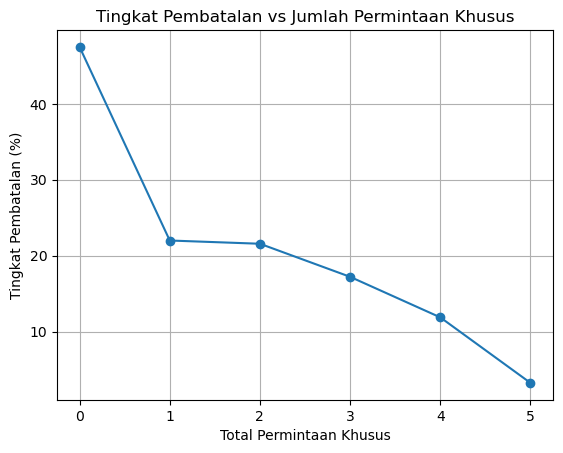

In [42]:
import matplotlib.pyplot as plt

plt.plot(grouped['total_of_special_requests'], grouped['cancelation_rate (%)'], marker='o')
plt.title('Tingkat Pembatalan vs Jumlah Permintaan Khusus')
plt.xlabel('Total Permintaan Khusus')
plt.ylabel('Tingkat Pembatalan (%)')
plt.grid(True)
plt.show()

Berikut Visualisasi atas Customer Loyal

C:\Users\user\AppData\Local\Temp\ipykernel_11820\2417045307.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=room_counts, x='reserved_room_type', y='count', palette='viridis')


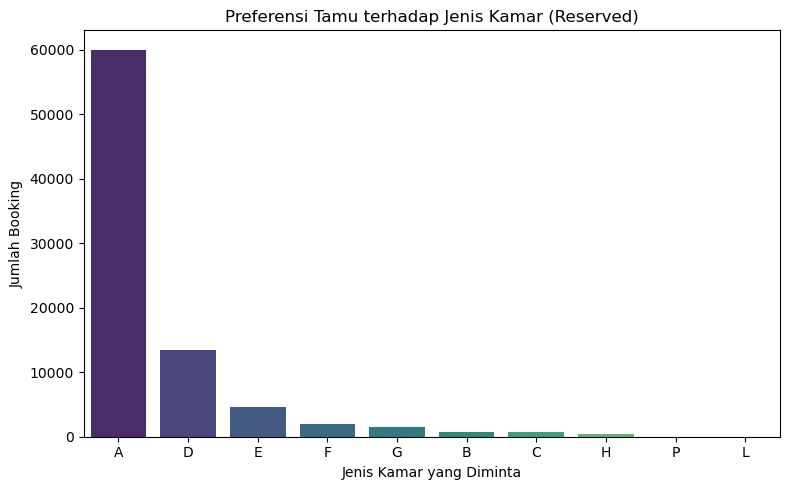

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

room_counts = My_hotel['reserved_room_type'].value_counts().reset_index()
room_counts.columns = ['reserved_room_type', 'count']

plt.figure(figsize=(8,5))
sns.barplot(data=room_counts, x='reserved_room_type', y='count', palette='viridis')
plt.title('Preferensi Tamu terhadap Jenis Kamar (Reserved)')
plt.xlabel('Jenis Kamar yang Diminta')
plt.ylabel('Jumlah Booking')
plt.tight_layout()
plt.show()


Dari grafik menunjukkan jenis kamar yang sering di booking adalah tipe kamar A

In [47]:
# 1. Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 2. Load data
My_hotel = pd.read_csv("data_hotel_booking_demand.csv")  # Ganti sesuai path kamu

# 3. Drop kolom tidak relevan / terlalu spesifik
drop_cols = ['reservation_status_date', 'arrival_date_year', 
             'arrival_date_week_number', 'arrival_date_day_of_month',
             'agent', 'company', 'reservation_status']
My_hotel.drop(columns=drop_cols, inplace=True, errors='ignore')

# 4. Encode data kategorikal
for col in My_hotel.select_dtypes(include='object').columns:
    My_hotel[col] = LabelEncoder().fit_transform(My_hotel[col].astype(str))

# 5. Hapus data null
My_hotel.dropna(inplace=True)

# 6. Pisahkan fitur dan target
X = My_hotel.drop(columns='is_canceled')
y = My_hotel['is_canceled']

# 7. Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 8. Model: Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 9. Prediksi
y_pred = model.predict(X_test)

# 10. Evaluasi
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[9240 1361]
 [1801 4313]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85     10601
           1       0.76      0.71      0.73      6114

    accuracy                           0.81     16715
   macro avg       0.80      0.79      0.79     16715
weighted avg       0.81      0.81      0.81     16715



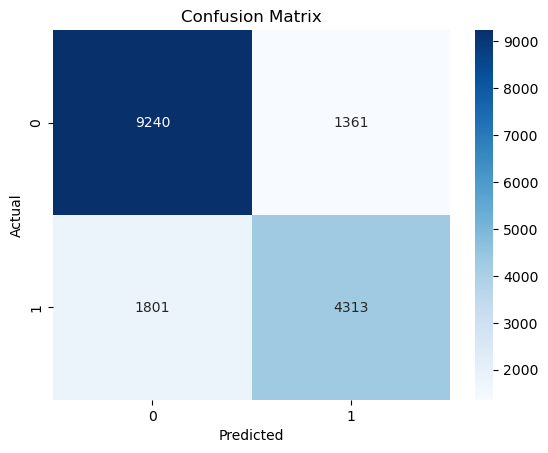

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


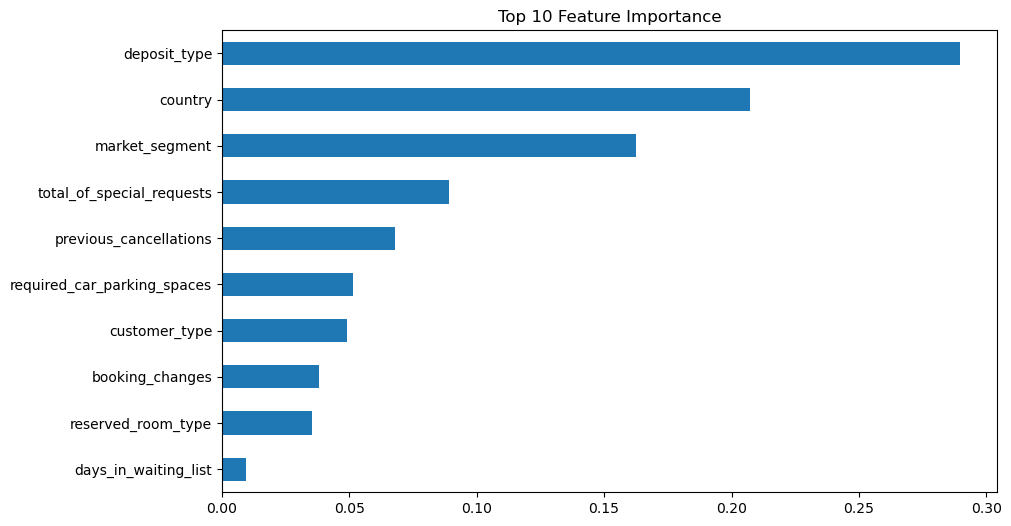

In [49]:
importances = model.feature_importances_
features = X.columns
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feat_importance.head(10).plot(kind='barh')
plt.title('Top 10 Feature Importance')
plt.gca().invert_yaxis()
plt.show()
